In [209]:
#Bibliotecas
import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.bipartite.generators import complete_bipartite_graph
#Biblioteca para tratar intercalação e permutação, além da escolha aleatória
import itertools
from collections import defaultdict
from networkx.utils import arbitrary_element

Alunos: Eduardo, Vitor, Daniel e Ricardo.

MIA: Análise de Dados em Grafos - PG-0083-23-X501

In [210]:
#Importando o Dataset
df_dados = pd.read_csv('ppgia_coautoria-bipartite.csv', delimiter=';', error_bad_lines=False, index_col=False, dtype='unicode', encoding='utf-8')

#Definindo a ANO como indice
df_dados.set_index('ANO', inplace=True)

#Ordenação por Autores ascedente
df_dados.sort_values(by=['AUTORES'], inplace=True)

#Criando o relacionamento
#df_dados['RELACAO'] = df_dados['TITULO']+';'+df_dados['AUTORES']

#Exibir os dados
df_dados.head(15)

TITULO               AUTORES
ANO                                                                          
2013  The Crosscutting Impact Of The Aosd Brazilian ...   "Claudio Sant'Anna"
2019  Classification Of Eeg Signals To Detect Alcoho...  "Eug'Nio Peixoto Jr"
2010  Collective Intelligence In Law Enforcement Â  ...  "Johnatas D'Orleans"
2009  An Evaluation Of The Performance Impact Of Gen...  "Jonathan D'Orleans"
2019  Detecting Parkinson's Disease With Sustained P...   "Rytis Maskeli'Nas"
2010  Drilling Tool Geometry Evaluation For Reinforc...       A Aguiar Vieira
2013  Drilling Delamination Outcomes On Glass And Si...       A Aguiar Vieira
2019  Deep Learning Iot System For Online Stroke Det...       A C Da S Barros
2009  Phase Transformations Evaluation On An Uns S31...          A C G Varela
2005       Mechanical Evalution Of A Respiratory Device          A C Gastaldi
2009  A Framework For Community-Oriented Interactive...      A C Pascalicchio
2009              Cloud Computing And Reservoir Project               A Galis
2009              Cloud Computing And Reservoir Project                A Hohl
2010  Drilling Of Carbon Fibre Reinforced Laminates ...          A M Baptista
2013  Drilling Delamination Outcomes On Glass And Si...          A M Baptista

In [211]:
#Total de Registros
df_dados.shape

(2370, 2)

In [212]:
#Quantidade de Autores sem o tratamento
print('Qtde. Autores: ',len(pd.unique(df_dados['AUTORES'])))

Qtde. Autores:  984


In [213]:
#Quantidade de Titulos sem o tratamento
print('Qtde. Titulos: ',len(pd.unique(df_dados['TITULO'])))

Qtde. Titulos:  478


In [214]:
#Numero total de valores nulos por coluna
df_dados.isna().mean()

TITULO     0.0
AUTORES    0.0
dtype: float64

In [215]:
#Convertendo todo o Dataset para string
df_dados = df_dados.astype(str)

#Tipo dos dados do Dataframe
df_dados.dtypes

TITULO     object
AUTORES    object
dtype: object

In [216]:
#Remover Duplicidades
df_dados.drop_duplicates(keep = False, inplace = True)

In [217]:
#Total de Registros
df_dados.shape

(2174, 2)

In [218]:
#Quantidade de Autores sem o tratamento
print('Qtde. Autores: ',len(pd.unique(df_dados['AUTORES'])))

Qtde. Autores:  951


In [219]:
#Quantidade de Titulos sem o tratamento
print('Qtde. Titulos: ',len(pd.unique(df_dados['TITULO'])))

Qtde. Titulos:  477


In [220]:
#Filtrar apenas o ano de 2005, para reduzir o tamanho da entrada e melhorar a visualização, indexado pelo ano
df_dados_filtrado = df_dados.filter(like = '2005', axis=0)

#Exibir o dado filtrado
df_dados_filtrado.head()

TITULO  \
ANO                                                       
2005       Mechanical Evalution Of A Respiratory Device   
2005  Fatores De Sucesso E Dificuldades Na Implement...   
2005  Enterprise-Oriented Software Development Envir...   
2005  Reference Model For Software Process Improveme...   
2005  Knowledge Management In A Software Development...   

                        AUTORES  
ANO                              
2005               A C Gastaldi  
2005  Adriano Bessa Albuquerque  
2005  Adriano Bessa Albuquerque  
2005  Adriano Bessa Albuquerque  
2005  Adriano Bessa Albuquerque

In [221]:
#Reduzindo o tamanho dos labels para que a plotagem fique nitida, tamanho 10, apenas para fins didádicos
for i in range(0, len(df_dados)):
    df_dados.iloc[i].TITULO = df_dados.iloc[i].TITULO[:10]
    df_dados.iloc[i].AUTORES = df_dados.iloc[i].AUTORES[:10]

In [222]:
#Criação dos nós a partir do dataframe
G = nx.from_pandas_edgelist(df_dados, 'TITULO', 'AUTORES')

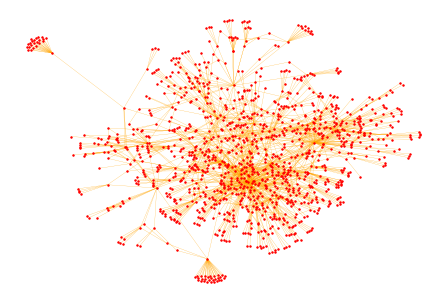

In [223]:
#Mostrar o Grafo sem os labels
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_color='red', node_size=2, edge_color='orange', width=0.2)

Grafo é Bipartido.
Grafo está Conectado.
Densidade: 0.01
Espectro: 1.0
Vertices Isolados: []
Diametro: 10
Coeficiente de Clustering: 0.0
Distância Média entre nós: {33: 1.8484848484848484, 1: 10.942953020134228, 9: 15.32638888888889, 7: 18.586734693877553, 6: 18.8359375, 10: 12.714285714285714, 2: 12.44818652849741, 5: 19.685, 15: 6.266666666666667, 23: 1.2173913043478262, 3: 14.771428571428572, 4: 18.89240506329114, 31: 8.016129032258064, 8: 15.576086956521738, 21: 9.095238095238095, 17: 10.735294117647058, 11: 12.663636363636364, 43: 10.837209302325581, 16: 18.0625, 18: 11.75, 26: 5.384615384615385, 12: 10.270833333333334, 13: 6.923076923076923, 14: 12.25, 19: 9.140350877192983, 24: 8.583333333333334, 36: 5.472222222222222, 29: 8.068965517241379, 25: 6.04, 27: 4.592592592592593, 20: 9.2, 92: 5.456521739130435, 132: 7.21969696969697}


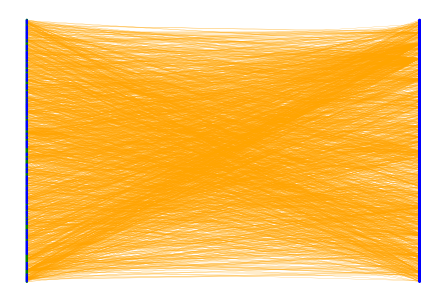

In [224]:
#Verifica se o grafo é bipartido
if nx.bipartite.is_bipartite(G):
    print('Grafo é Bipartido.')
    if nx.is_connected(G):
        print('Grafo está Conectado.')
        #Separar os dois conjuntos de vertices, verificação necessária porque se o Grafo não estiver conectado
        #Existirá mais de uma cor possível
        bottom_nodes, top_nodes = nx.bipartite.sets(G)
    else:
        top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
        bottom_nodes = set(G) - top_nodes
    
#Exibindo a densidade
print('Densidade:',round(nx.bipartite.density(G, bottom_nodes), 2))

#Exibindo o Espectro do Grafo Bipartido
print('Espectro:',nx.bipartite.spectral_bipartivity(G))

#Exibindo os vertices isolados
print('Vertices Isolados:',list(nx.isolates(G)))

#Exibindo o Diametro
print('Diametro:',nx.diameter(G))

#Exibindo o Coeficiente de Clustering
print('Coeficiente de Clustering:',nx.average_clustering(G))

#Exibindo a Distância entre nós
print('Distância Média entre nós:',nx.k_nearest_neighbors(G))
        
#Separar em cores
color_list = []
for v in bottom_nodes:
    color_list.append('green')
    G.nodes[v]['COR']= 'green'
for v in top_nodes:
    color_list.append('blue')
    G.nodes[v]['COR']= 'blue'

#Plotando o novo Grafo separando em cores o grafo bipartido
nx.draw(G, pos=nx.bipartite_layout(G, bottom_nodes), with_labels=False, node_color = color_list, node_size=2, edge_color='orange', width=0.2)

Grafo é Bipartido.
Grafo está Conectado.
Densidade: 0.01
Espectro: 1.0
Vertices Isolados: []
Diametro: 10
Coeficiente de Clustering: 0.0
Distância Média entre nós: {33: 1.8484848484848484, 1: 10.942953020134228, 9: 15.32638888888889, 7: 18.586734693877553, 6: 18.8359375, 10: 12.714285714285714, 2: 12.44818652849741, 5: 19.685, 15: 6.266666666666667, 23: 1.2173913043478262, 3: 14.771428571428572, 4: 18.89240506329114, 31: 8.016129032258064, 8: 15.576086956521738, 21: 9.095238095238095, 17: 10.735294117647058, 11: 12.663636363636364, 43: 10.837209302325581, 16: 18.0625, 18: 11.75, 26: 5.384615384615385, 12: 10.270833333333334, 13: 6.923076923076923, 14: 12.25, 19: 9.140350877192983, 24: 8.583333333333334, 36: 5.472222222222222, 29: 8.068965517241379, 25: 6.04, 27: 4.592592592592593, 20: 9.2, 92: 5.456521739130435, 132: 7.21969696969697}


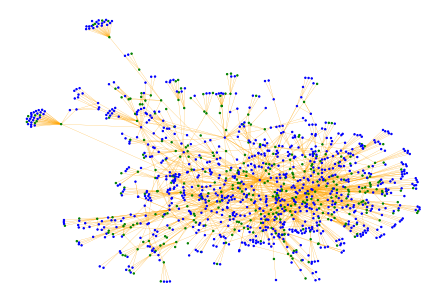

In [225]:
#Verifica se o grafo é bipartido
if nx.bipartite.is_bipartite(G):
    print('Grafo é Bipartido.')
    if nx.is_connected(G):
        print('Grafo está Conectado.')
        #Separar os dois conjuntos de vertices, verificação necessária porque se o Grafo não estiver conectado
        #Existirá mais de uma cor possível
        bottom_nodes, top_nodes = nx.bipartite.sets(G)
    else:
        top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
        bottom_nodes = set(G) - top_nodes
    
#Exibindo a densidade
print('Densidade:',round(nx.bipartite.density(G, bottom_nodes), 2))

#Exibindo o Espectro do Grafo Bipartido
print('Espectro:',nx.bipartite.spectral_bipartivity(G))

#Exibindo os vertices isolados
print('Vertices Isolados:',list(nx.isolates(G)))

#Exibindo o Diametro
print('Diametro:',nx.diameter(G))

#Exibindo o Coeficiente de Clustering
print('Coeficiente de Clustering:',nx.average_clustering(G))

#Exibindo a Distância entre nós
print('Distância Média entre nós:',nx.k_nearest_neighbors(G))
        
#Separar em cores
color_list = []
for v in bottom_nodes:
    color_list.append('green')
    G.nodes[v]['COR']= 'green'
for v in top_nodes:
    color_list.append('blue')
    G.nodes[v]['COR']= 'blue'

#Plotando o novo Grafo separando em cores o grafo bipartido
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_color = color_list, node_size=2, edge_color='orange', width=0.2)

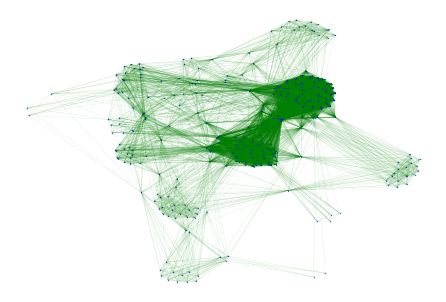

In [226]:
# Porjeção do Grafo
Gp = nx.bipartite.projected_graph(G, bottom_nodes)
nx.draw(Gp, node_size=0.1, node_color='b', edge_color='g', width=0.05)

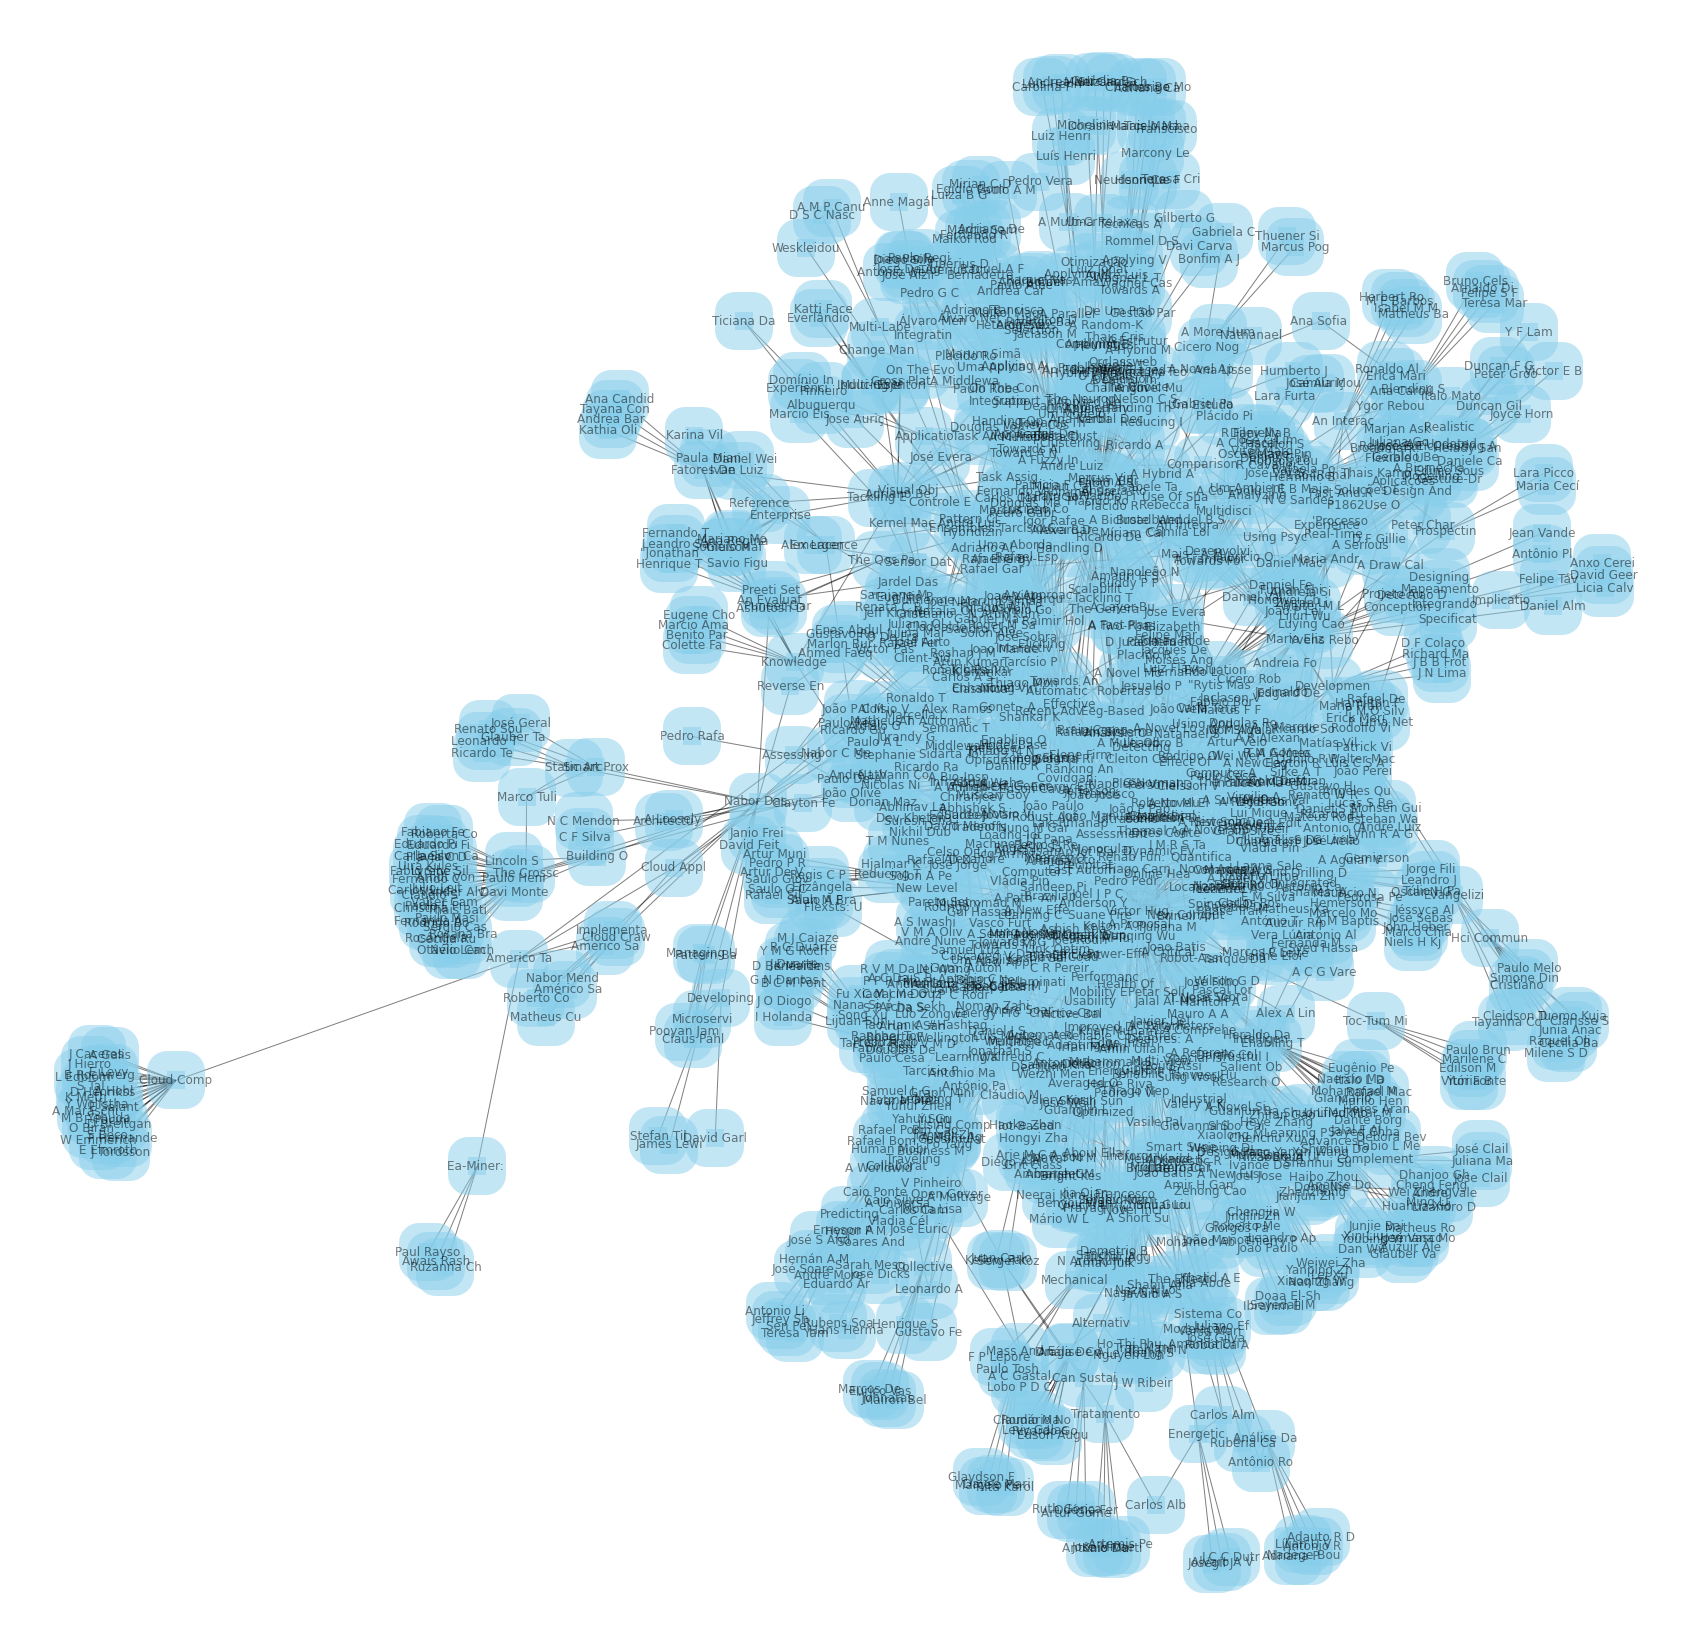

In [227]:
#Plotando um novo grafo tentando melhorar a visualização, agora com os labels com 10 de tamanho cada
fig, ax = plt.subplots(figsize=(30,30))
nx.draw(G, with_labels=True, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()

Grafo é Bipartido.
Grafo está Conectado.
Densidade: -0.0
Espectro: 1.0


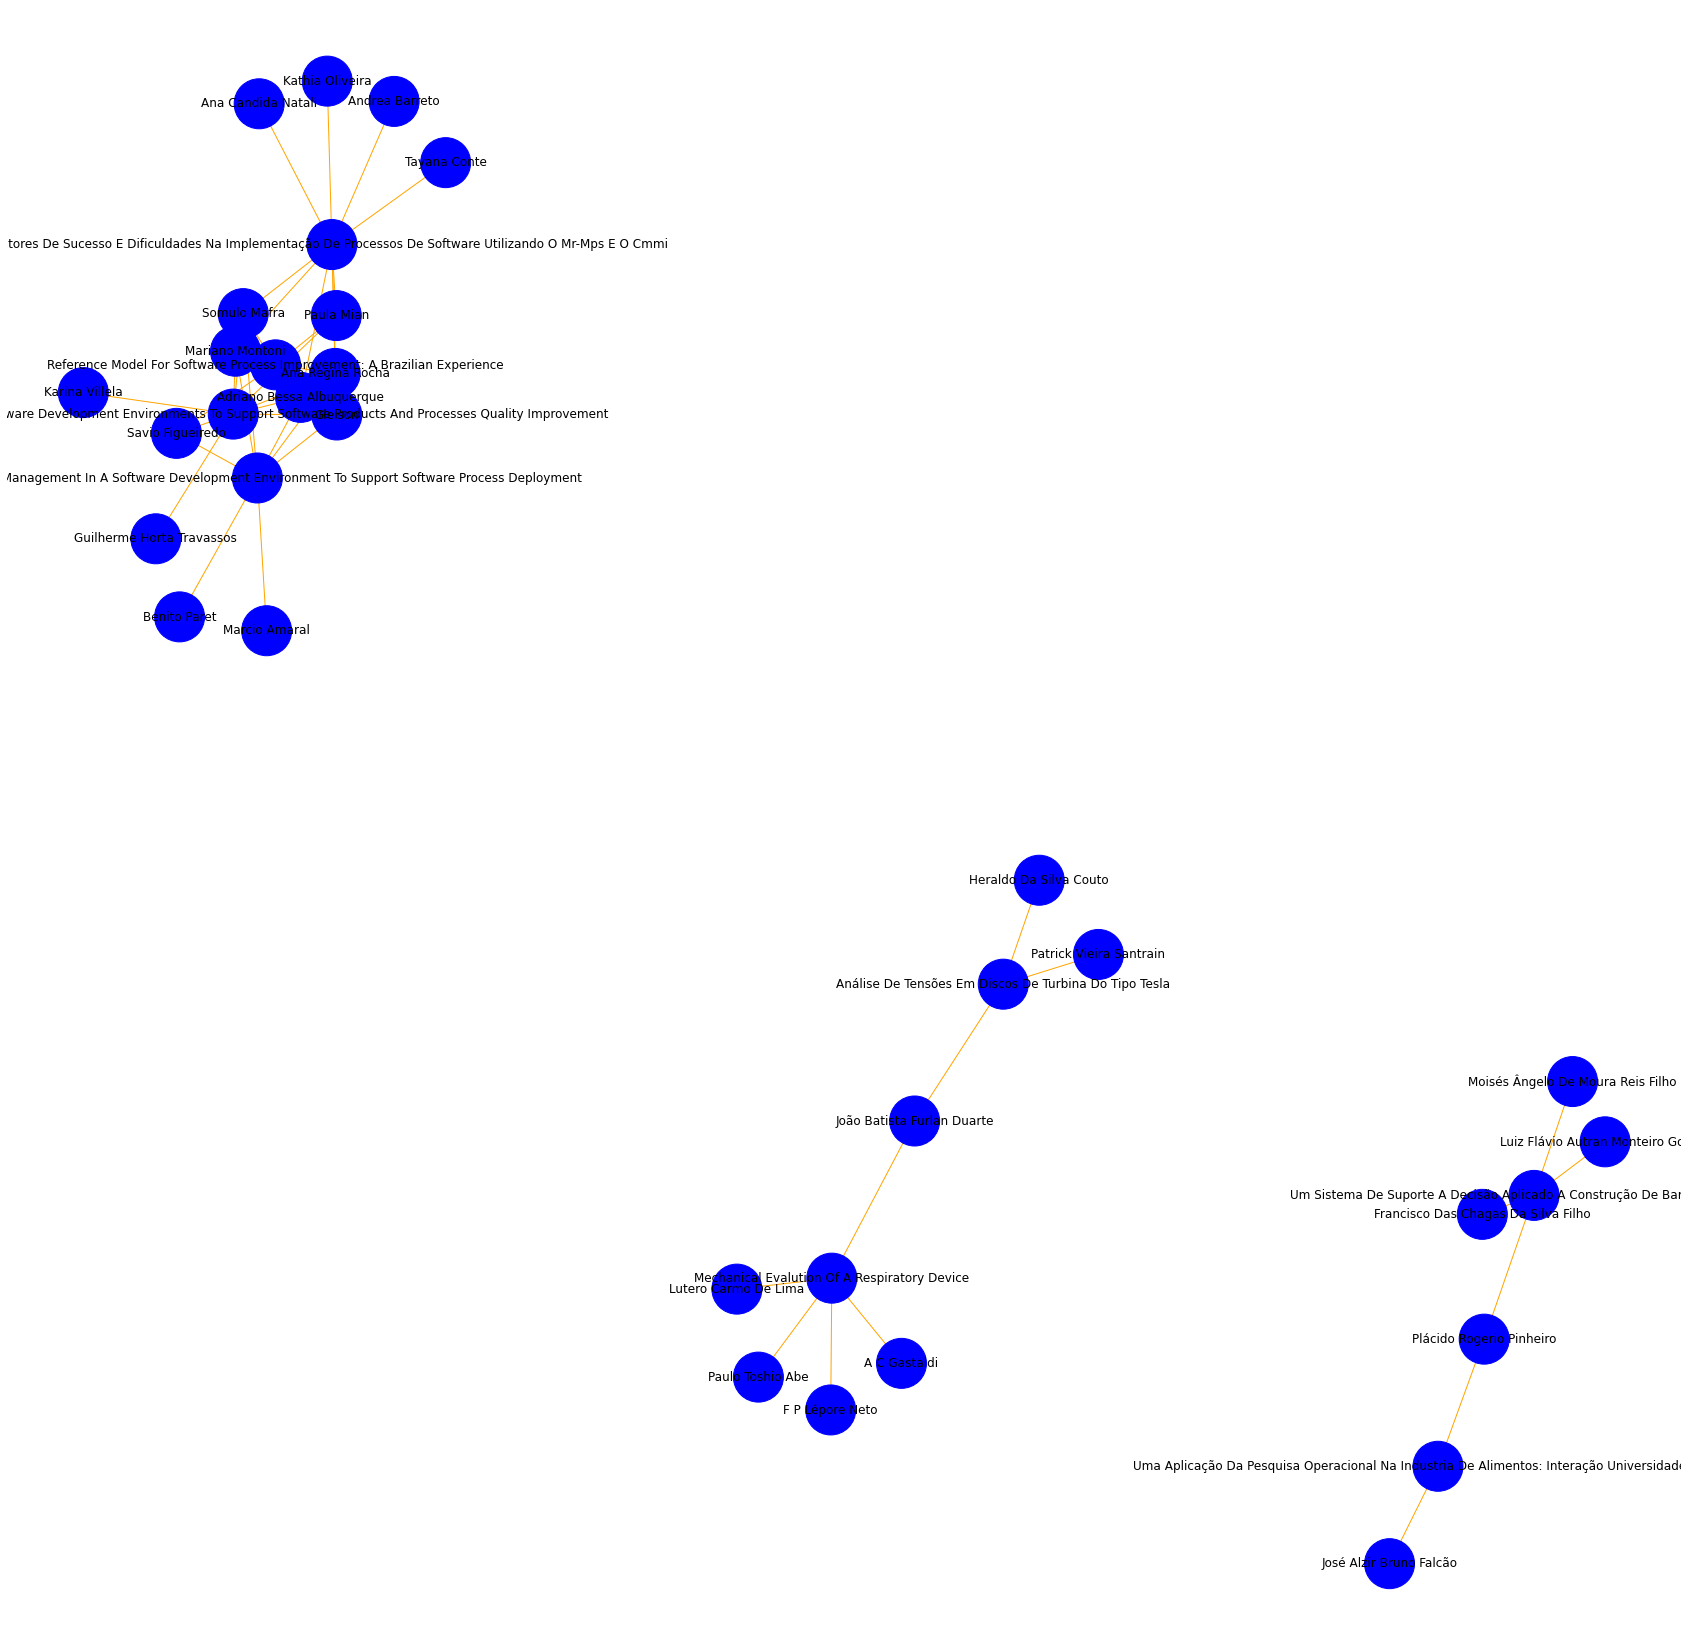

In [228]:
#Criando o grafo filtrado por ano = 2005, percebemos que gera uma densidade negativa, quando filtramos a entrada
G1 = nx.from_pandas_edgelist(df_dados_filtrado, 'TITULO', 'AUTORES')

#Verifica se o grafo é bipartido
if nx.bipartite.is_bipartite(G1):
    print('Grafo é Bipartido.')
    if nx.is_connected(G1):
        print('Grafo está Conectado.')
    else:
        print('Grafo está Conectado.')
else:
    print('Grafo é Monopartido.')

#Exibindo a densidade
print('Densidade:',round(nx.bipartite.density(G1, bottom_nodes), 2))

#Exibindo o Espectro do Grafo Bipartido
print('Espectro:',nx.bipartite.spectral_bipartivity(G1))
    
#Plotando o Grafo
colors = ["blue" for n in G1.nodes(data=True)]
fig, ax = plt.subplots(figsize=(30,30))
node_size = [2500 for node in G1.nodes]
nx.draw_networkx(G1, node_size=node_size, node_color=colors, edge_color='orange')
plt.axis("off")
plt.show()

#### Representação da conversão de Grafo Bipartido para Monopartido ponderado

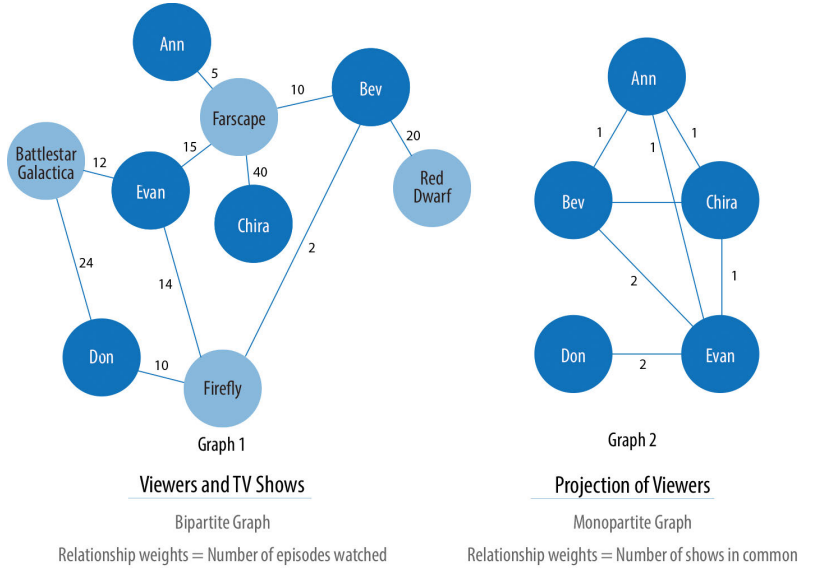

In [229]:
#Removendo os vertices que identicamos com o atributo COR, neste caso green para deixar os autores
to_remove = []
for node in G.nodes(data = True):
    if node[1]["COR"] == "green": ## check if the node is green
        to_remove.append(node[0])
        ## go over all neighbours of the node and add an edge between them
        neighbours =  list(G.neighbors(node[0]))
        for i in range(0, len(neighbours)-1):
            for j in range(i+1, len(neighbours)):
                G.add_edge(neighbours[i],neighbours[j])

## remove the green nodes
G.remove_nodes_from(to_remove)

Grafo é Monopartido.


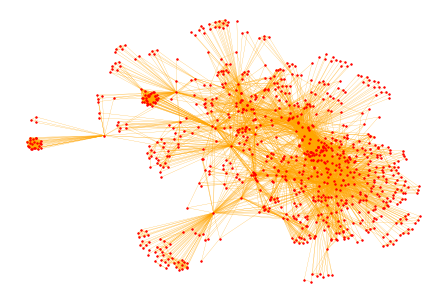

In [230]:
#Verifica se o grafo é bipartido
if nx.bipartite.is_bipartite(G):
    print('Grafo é Bipartido.')
    if nx.is_connected(G):
        print('Grafo está Conectado.')
        #Separar os dois conjuntos de vertices, verificação necessária porque se o Grafo não estiver conectado
        #Existirá mais de uma cor possível
        bottom_nodes, top_nodes = nx.bipartite.sets(G)
    else:
        top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
        bottom_nodes = set(G) - top_nodes
else:
    print('Grafo é Monopartido.')

    
#Plotando o novo Grafo
#Mostrar o Grafo sem os labels
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_color='red', node_size=2, edge_color='orange', width=0.2)

In [231]:
#Os 10 Maiores Autores com Maior colaboração com outros autores
df_dados.groupby(['AUTORES']).TITULO.value_counts().nlargest(10)

AUTORES     TITULO    
Plácido Ro  Towards Th    9
Victor Hug  Automatic     8
            Evaluation    8
J M R S Ta  Evaluation    5
Plácido Ro  A Multi-Cr    5
            A Hybrid M    4
            Applying A    4
            Applying V    4
Victor Hug  Intelligen    4
Ana Karoli  Towards Th    3
Name: TITULO, dtype: int64

In [232]:
#Os 10 Maiores Autores com artigos compartilhados
df_dados.AUTORES.value_counts().nlargest(10)

Victor Hug    172
Plácido Ro    136
Maria Eliz     37
Joao Jose      37
Maria Andr     34
Joel J P C     31
J M R S Ta     30
André Luís     27
João Batis     26
Raimir Hol     23
Name: AUTORES, dtype: int64

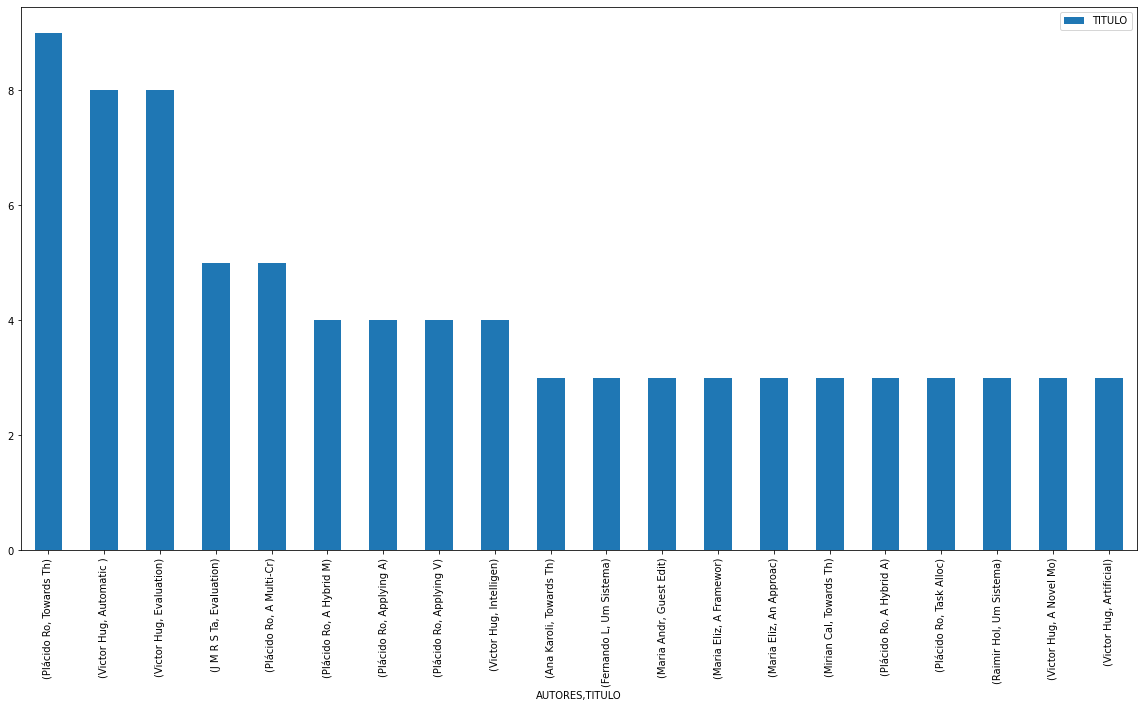

In [233]:
#Plotando um grafico de frequencia dos 10 maiores autores por titulos publicados
plt.figure(figsize=(20, 10))

df_dados.groupby(['AUTORES']).TITULO.value_counts().nlargest(20).plot.bar(legend=True)

plt.show()

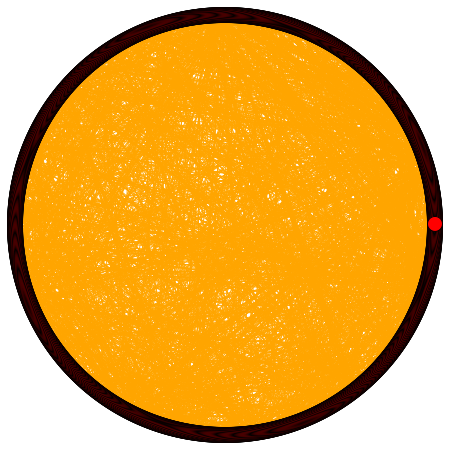

In [234]:
#Importando a biblioteca Ipgrah com Python
#Não encontrei na biblioteca Igraph uma forma de criar o grafo com layout bipartido por padrão, por isso migrei para o R
from igraph import *

##Criando o Grafo a partir do Dataframe
ig = Graph.DataFrame(df_dados, directed=False)

#Definindo o Layout do Gráfico
layout = ig.layout("circle")

##Criando o Estilo
visual_style = {}
##Layout
visual_style["layout"] = layout
visual_style["margin"] = 15
visual_style["vertex_size"] = 15
visual_style["vertex_shape"] = 'circle'
visual_style["bbox"] = (450, 450)
visual_style["edge_curved"] = 0
visual_style["edge_color"] = 'orange'

##Plotar o Grafo
plot(ig, **visual_style)